In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gzip, glob, os, csv
import seaborn as sns

from cdt.metrics import SID, SHD

from sklearn.metrics import precision_score, recall_score, average_precision_score


No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [3]:
def L1(target, pred):
    return np.sum(np.abs(target - pred))

def binarize(X):
    return (X != 0) * 1

# def get_auprc(w_true, w, thresholds=np.arange(0, 0.3, 0.25)):
#     w_true = binarize(w_true)
# #     w = binarize(w)
#     for c in thresholds:
#         w[np.abs(w) < c] = 0
#         w_bin = binarize(w)
        
        

In [4]:
# METHODS = ['dotears', 
#            'notears', 
#            'sortnregress', 
#            'golem-ev', 
#            'golem-nv', 
#            'direct-lingam', 
#            'igsp', 
#            'gies', 
#            'ut-igsp',
#            'dcdi-g']

METHODS = ['dotears', 'dcdi-g', 'sortnregress']

DAG_MODELS = ['erdos_renyi', 'scale_free']



In [6]:
df = pd.DataFrame(columns=['method', 
                           'L1 dist', 
                           'SHD', 
                           'p', 
                           'precision', 
                           'recall', 
                           'auprc',
                           'experiment',
                           ])

fdr_df = pd.DataFrame(columns=['fdr', 'w', 'method', 'type'])

param_grids = []

out_base = '/u/home/a/asxue/project-hjp/dotears/data/dcdi_sims/out/'
true_base = '/u/home/a/asxue/project-hjp/dotears/data/dcdi_sims/dags/'
data_base = '/u/home/a/asxue/project-hjp/dotears/data/dcdi_sims/data/'

experiments = [os.path.basename(x) for x in glob.glob(os.path.join(out_base, '*'))]
    
for experiment in experiments:
    out_dir = os.path.join(out_base, experiment)
    true_dir = os.path.join(true_base, experiment)
    data_dir = os.path.join(data_base, experiment)

    for method in METHODS:
        for i in range(1, 11):
            w_true = np.loadtxt(os.path.join(true_dir, f'sim_{i}.txt'))

                
            W = np.load(os.path.join(out_dir, method, f'sim_{i}.npy'))
            
            
            auprc = average_precision_score(w_true.flatten(), W.flatten())

            W[np.abs(W) < 0.1] = 0

#                 if (method == 'dotears') and (experiment == 'data_p10_e10_n10000_linear_struct'):
#                     print(binarize(W))
#                     print(w_true)
#                     print()

            l1_dist = L1(w_true, W)
            shd = SHD(binarize(w_true), binarize(W), double_for_anticausal=False)
            precision = precision_score(w_true.flatten(), binarize(W).flatten())
            recall = recall_score(w_true.flatten(), binarize(W).flatten())


            df.loc[len(df.index), :] = [method, 
                                        l1_dist,
                                        shd,
                                        W.shape[0],
                                        precision,
                                        recall,
                                        auprc,
                                        experiment,
                                       ] 



Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [7]:
perfect_interventions = df['experiment'].str.contains('_perfect')
imperfect_interventions = df['experiment'].str.contains('_imperfect')

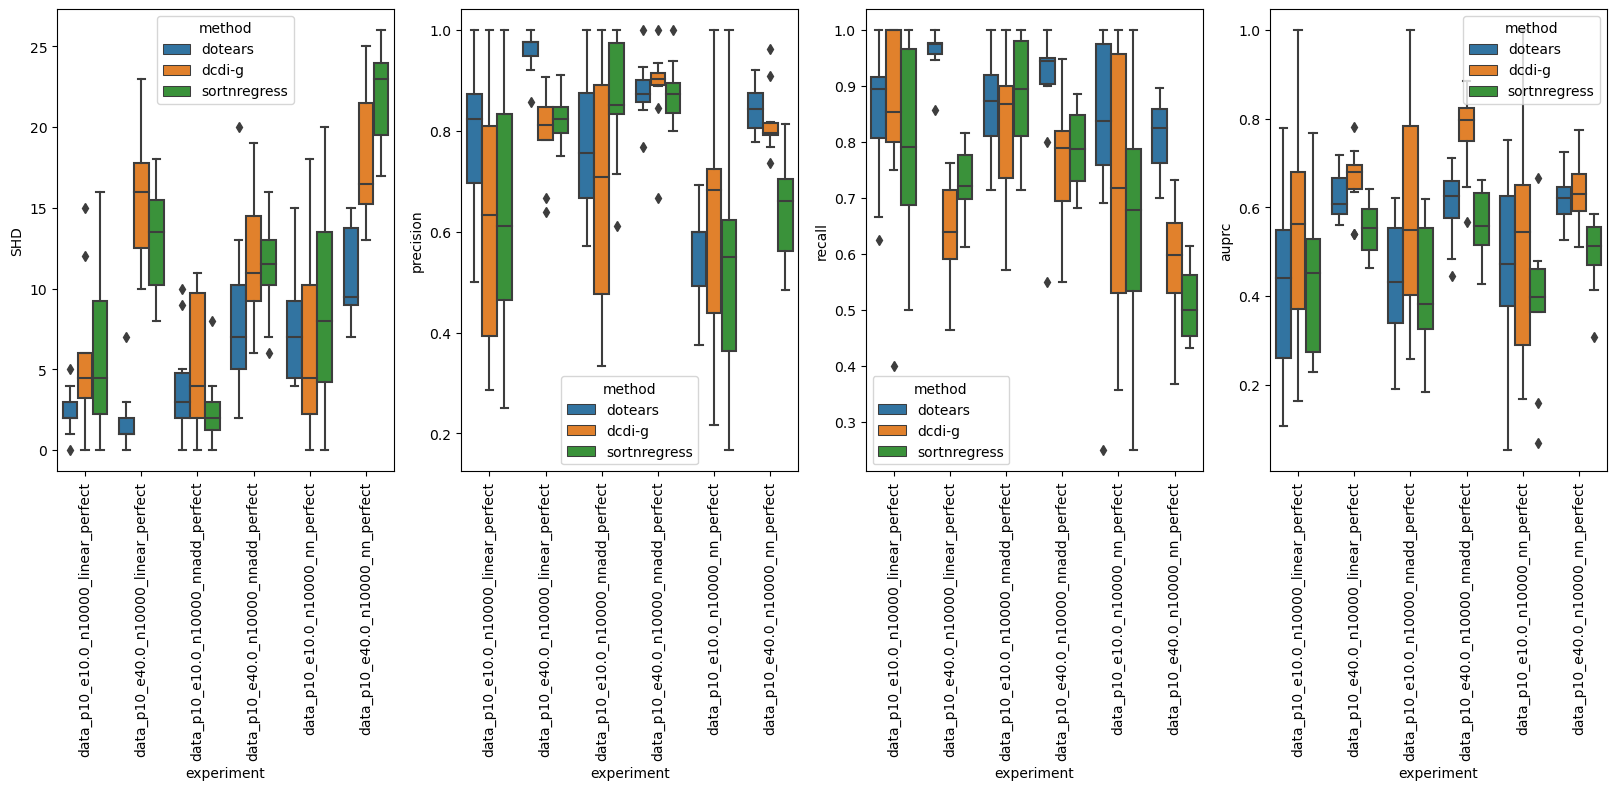

In [12]:
order = [
    'data_p10_e10.0_n10000_linear_perfect',
    'data_p10_e40.0_n10000_linear_perfect',
    'data_p10_e10.0_n10000_nnadd_perfect',
    'data_p10_e40.0_n10000_nnadd_perfect',
    'data_p10_e10.0_n10000_nn_perfect',
    'data_p10_e40.0_n10000_nn_perfect',
]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_figheight(6)
fig.set_figwidth(20)
sns.boxplot(data=df[perfect_interventions], x='experiment', y='SHD', hue='method', ax=ax1, order=order)
ax1.tick_params(axis='x', rotation=90)

sns.boxplot(data=df[perfect_interventions], x='experiment', y='precision', hue='method', ax=ax2, order=order)
ax2.tick_params(axis='x', rotation=90)

sns.boxplot(data=df[perfect_interventions], x='experiment', y='recall', hue='method', ax=ax3, order=order)
ax3.tick_params(axis='x', rotation=90)

sns.boxplot(data=df[perfect_interventions], x='experiment', y='auprc', hue='method', ax=ax4, order=order)
ax4.tick_params(axis='x', rotation=90)

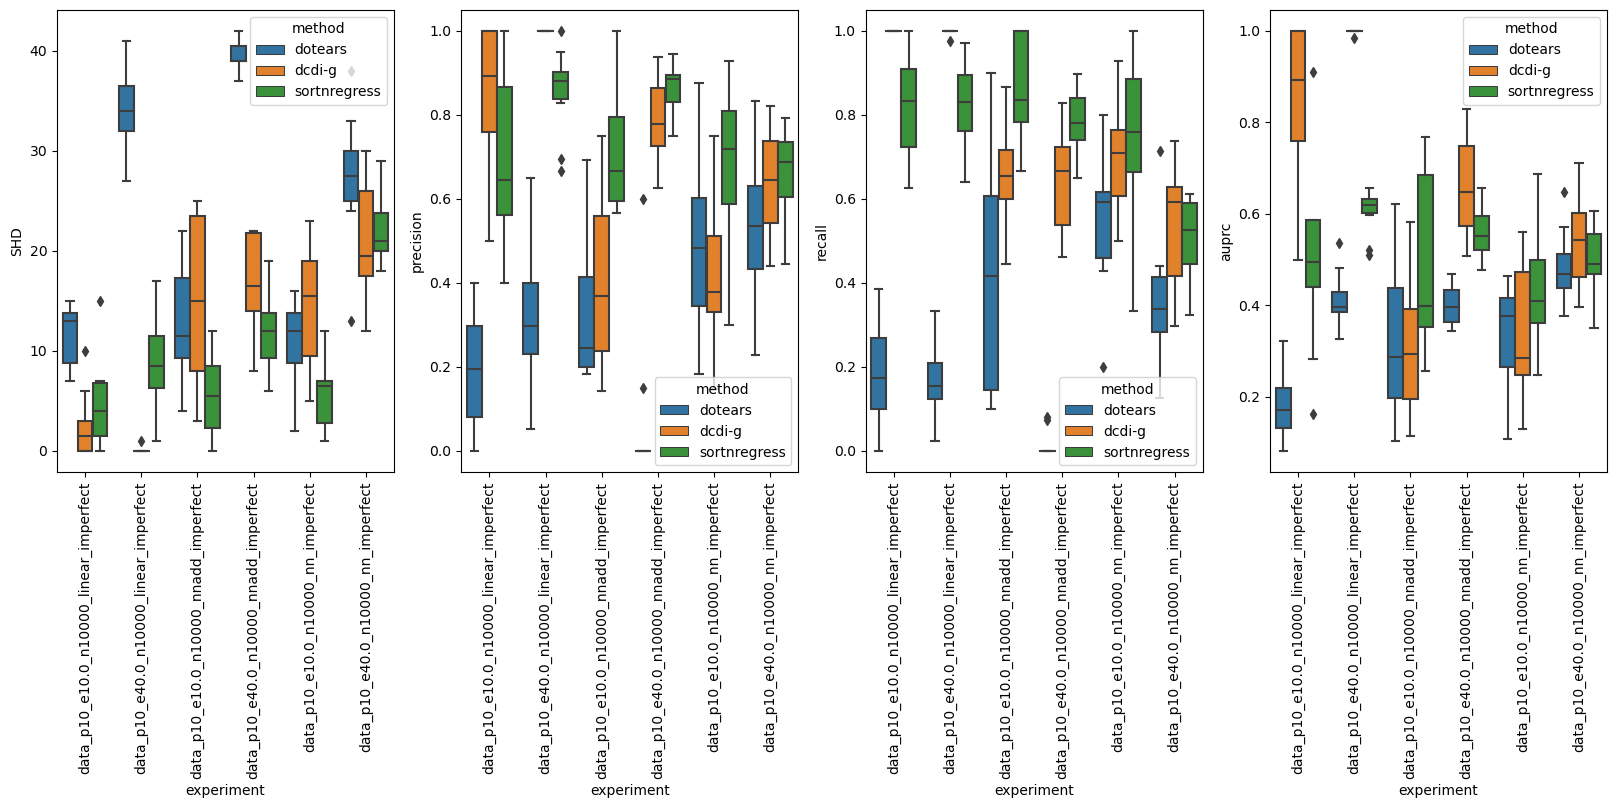

In [13]:
order = [
    'data_p10_e10.0_n10000_linear_imperfect',
    'data_p10_e40.0_n10000_linear_imperfect',
    'data_p10_e10.0_n10000_nnadd_imperfect',
    'data_p10_e40.0_n10000_nnadd_imperfect',
    'data_p10_e10.0_n10000_nn_imperfect',
    'data_p10_e40.0_n10000_nn_imperfect',
]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_figheight(6)
fig.set_figwidth(20)
sns.boxplot(data=df[imperfect_interventions], x='experiment', y='SHD', hue='method', ax=ax1, order=order)
ax1.tick_params(axis='x', rotation=90)

sns.boxplot(data=df[imperfect_interventions], x='experiment', y='precision', hue='method', ax=ax2, order=order)
ax2.tick_params(axis='x', rotation=90)

sns.boxplot(data=df[imperfect_interventions], x='experiment', y='recall', hue='method', ax=ax3, order=order)
ax3.tick_params(axis='x', rotation=90)

sns.boxplot(data=df[imperfect_interventions], x='experiment', y='auprc', hue='method', ax=ax4, order=order)
ax4.tick_params(axis='x', rotation=90)